In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import math

# Load the dataset from JSON
data = pd.read_json("synthetic_waste_data.json")

# Convert 'date' and 'time' columns to datetime format
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%Y-%m-%d %H:%M')

# Sort by datetime just to ensure correct order
data = data.sort_values(by='datetime')

# Set datetime as the index for time series analysis
data.set_index('datetime', inplace=True)

# Let's focus on one dustbin for prediction (e.g., dustbin_id=1)
bin_data = data[data['dustbin_id'] == 1]['filled_capacity']

# Visualize the data for dustbin 1
plt.figure(figsize=(12,6))
plt.plot(bin_data, label='Filled Capacity')
plt.title('Waste Generation Over Time for Dustbin 1')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(bin_data) * 0.95)
train_data, test_data = bin_data[:train_size], bin_data[train_size:]

# Define the SARIMA model order
p = 1  # autoregressive terms
d = 1  # number of differencing
q = 1  # moving average terms
seasonal_order = (1, 1, 1, 24)  # (P, D, Q, S), where S=24 for daily seasonality

# Fit the SARIMA model
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('E-SARIMA Predictions vs Actual (Dustbin 1)')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()

# Full graph combining training and test data
plt.figure(figsize=(12,6))
plt.plot(bin_data.index, bin_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted (Test)', color='red', linestyle='--')
plt.title('Waste Generation - Full Time Series with E-SARIMA Predictions (Dustbin 1)')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()


TypeError: unsupported operand type(s) for +: 'DatetimeArray' and 'str'

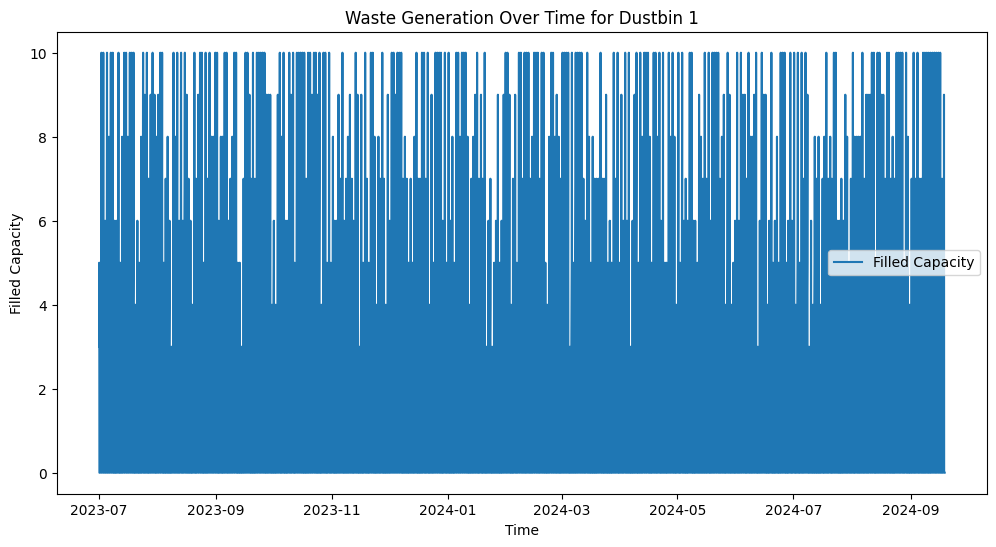

C:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dhyey\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import math

# Load the dataset from JSON
data = pd.read_json("synthetic_waste_data.json")

# Ensure 'date' and 'time' columns are strings before concatenating
data['date'] = data['date'].astype(str)
data['time'] = data['time'].astype(str)

# Convert 'date' and 'time' columns to datetime format
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'], format='%Y-%m-%d %H:%M')

# Sort by datetime to ensure correct order
data = data.sort_values(by='datetime')

# Set datetime as the index for time series analysis
data.set_index('datetime', inplace=True)

# Let's focus on one dustbin for prediction (e.g., dustbin_id=1)
bin_data = data[data['dustbin_id'] == 1]['filled_capacity']

# Visualize the data for dustbin 1
plt.figure(figsize=(12,6))
plt.plot(bin_data, label='Filled Capacity')
plt.title('Waste Generation Over Time for Dustbin 1')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()

# Split the data into training and testing sets (e.g., 80% train, 20% test)
train_size = int(len(bin_data) * 0.95)
train_data, test_data = bin_data[:train_size], bin_data[train_size:]

# Define the SARIMA model order
p = 1  # autoregressive terms
d = 1  # number of differencing
q = 1  # moving average terms
seasonal_order = (1, 1, 1, 24)  # (P, D, Q, S), where S=24 for daily seasonality

# Fit the SARIMA model
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Make predictions
predictions = model_fit.forecast(steps=len(test_data))

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(test_data.index, test_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted', color='red', linestyle='--')
plt.title('E-SARIMA Predictions vs Actual (Dustbin 1)')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()

# Full graph combining training and test data
plt.figure(figsize=(12,6))
plt.plot(bin_data.index, bin_data, label='Actual', color='blue')
plt.plot(test_data.index, predictions, label='Predicted (Test)', color='red', linestyle='--')
plt.title('Waste Generation - Full Time Series with E-SARIMA Predictions (Dustbin 1)')
plt.xlabel('Time')
plt.ylabel('Filled Capacity')
plt.legend()
plt.show()
